# IMC_Denoise $-$ a content aware denoising pipeline to enhance imaging mass cytometry

Here we will show an example for CD14 channel denoising using our own human bone marrow IMC dataset. First, import all the essential libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tp
from IMC_Denoise.IMC_Denoise_main.DIMR import DIMR
from IMC_Denoise.IMC_Denoise_main.DeepSNF import DeepSNF

Using TensorFlow backend.


### Load the pre-trained denoisng model for CD14

In [ ]:
weights_name = "weights_CD14.hdf5" # trained network weights saved here. If None, the weights will not be saved.
weights_save_directory = None # location where 'weights_name' and 
# 'loss_name' saved. If the value is None, the files will be saved in the current file folder.
is_load_weights = True # read from the saved one.
deepsnf = DeepSNF(weights_name = weights_name,
                  weights_dir = weights_save_directory, 
                  is_load_weights = is_load_weights)

### Load a raw CD14 image

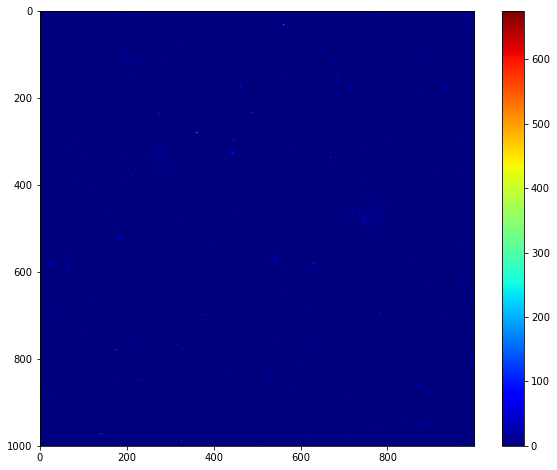

In [5]:
# read a CD38 raw image.
Img_raw = tp.imread(r'D:\IMC analysis\Raw_IMC_dataset\H1527531_r2\144Nd-CD14_Nd144.tiff')
plt.figure(figsize = (10,8))
plt.imshow(Img_raw, vmin = 0, vmax = 0.5*np.max(Img_raw), cmap = 'jet')
plt.colorbar()
plt.show()

### Perform the DIMR algorithm only if the SNR of the raw image is high.

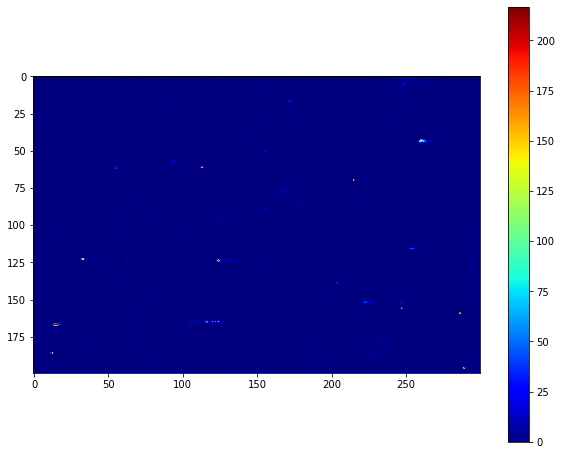

In [8]:
n_neighbours = 4 # Larger n enables removing more consecutive hot pixels. 
n_lambda = 5 # Smaller n enables removing more hot pixels but may also generate false negatives. 
window_size = 3 # Slide window size. For IMC images, window_size = 3 is fine.
Img_DIMR = DIMR(n_neighbours = n_neighbours, n_lambda = n_lambda, window_size = window_size).perform_DIMR(Img_raw)
plt.figure(figsize = (10,8))
plt.imshow(Img_DIMR, vmin = 0, vmax = 0.5*np.max(Img_DIMR), cmap = 'jet')
plt.colorbar()
plt.show()

### If the SNR of the raw image is sub-optimal, perform DIMR and DeepSNF algorithms for low SNR raw images.
If errors happen, check if the GPUs are being used by other sessions. If yes, shutdown the session occupying GPUs and re-run the prediction.

In [ ]:
# perform DIMR and DeepSNF algorithms for low SNR raw images.
Img_DIMR_DeepSNF = deepsnf.perform_IMC_Denoise(Img_raw, n_neighbours = n_neighbours, n_lambda = n_lambda, window_size = window_size)
plt.figure(figsize = (10,8))
plt.imshow(Img_DIMR_DeepSNF, vmin = 0, vmax = 0.5*np.max(Img_DIMR_DeepSNF), cmap = 'jet')
plt.colorbar()
plt.show()